In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Load_data=pd.read_csv('loan_data.csv')

<h1>2. Analysis Requirement</h1>

### Univariate analysis

In [4]:
Load_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
#Finfo for each column
Load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
#Datatypes For each column
Load_data.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [7]:
#  checking for null values
Load_data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# Cleaning 

In [8]:
# Removing Duplicates
original_len = len(Load_data)
Load_data.drop_duplicates(inplace=True)
print(f"Removed {original_len-len(Load_data)} duplicates")

Removed 0 duplicates


In [9]:
# Checking for missing values
rows_with_missig_values = Load_data[Load_data.isnull().any(axis=1)]

if not rows_with_missig_values.empty:
     print(len(rows_with_missig_values))
else:
    print("No missing value found")

No missing value found


## For numerical columns:

<Axes: xlabel='person_gender', ylabel='loan_amnt'>

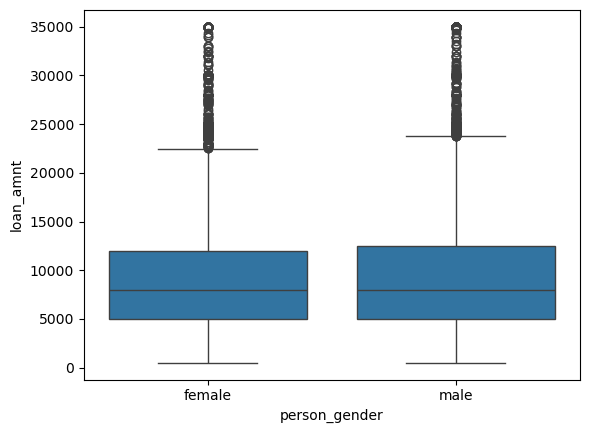

In [10]:
#Box plot
#Load amount according to gender 
sns.boxplot(x='person_gender', y='loan_amnt', data=Load_data)
#Result: Almost same loan amount
#To much outlier

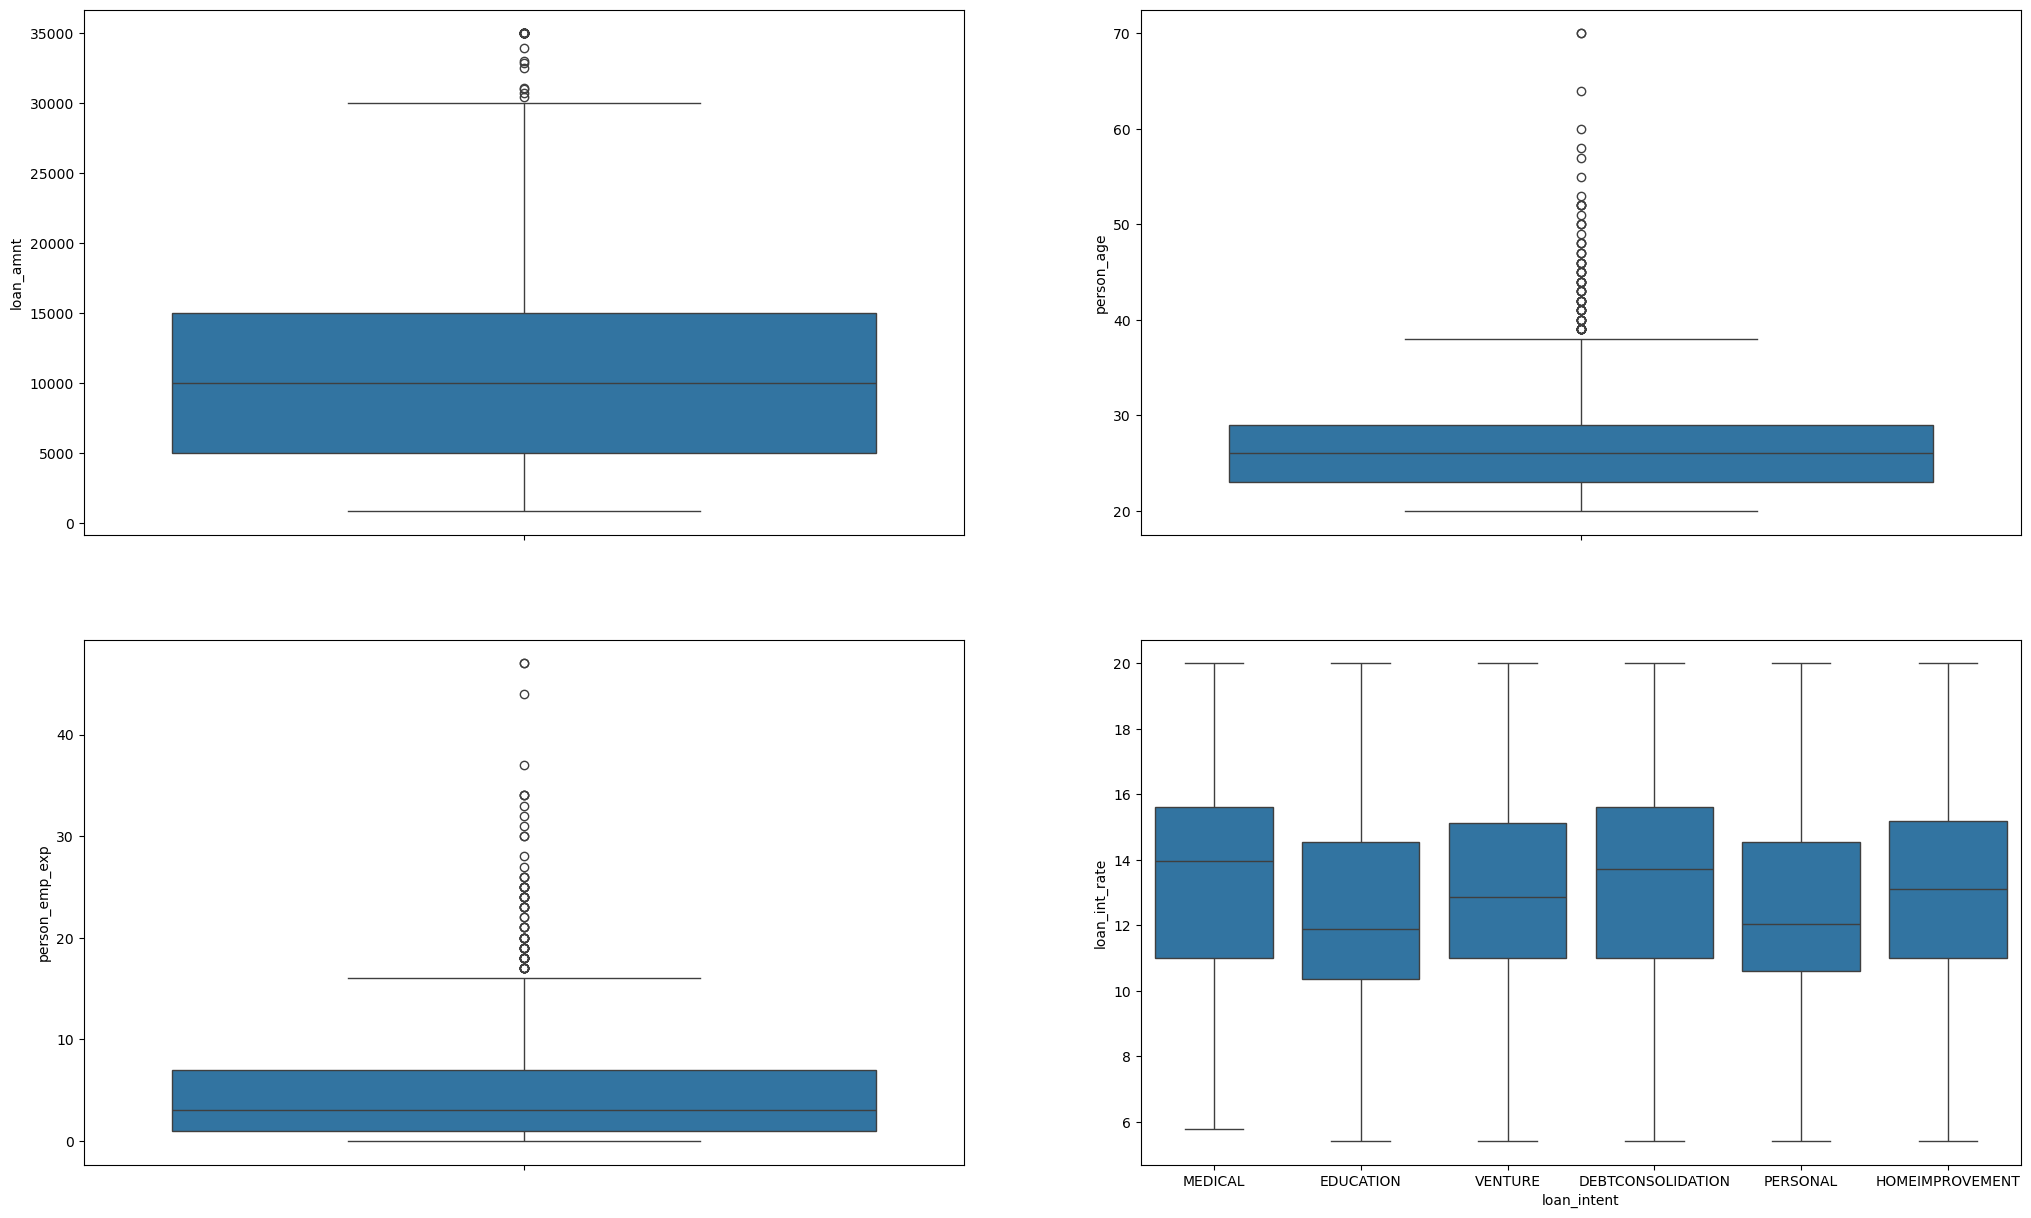

In [11]:
# Box plot
# This is not giving proper output which can be used for analysis
# sns.boxplot(x='loan_status', y='person_income', data=Load_data)
# Splitting Data set to understand the box plot

# Splitting Data according to Education to make the output more clear
# Bachelors
plt.figure(figsize=(25,15))
Bachelors = Load_data[(Load_data['person_education'] == 'Bachelor') & (Load_data['loan_status'] == 1)]

plt.subplot(2,2,1)
sns.boxplot(y='loan_amnt', data=Bachelors)

plt.subplot(2,2,2)
sns.boxplot(y='person_age', data=Bachelors)

plt.subplot(2,2,3)
sns.boxplot(y='person_emp_exp', data=Bachelors)

plt.subplot(2,2,4)
sns.boxplot(x='loan_intent', y='loan_int_rate', data=Bachelors)

plt.show()


<b>We get following Analysis from above Bachalor Student:<br></b>
1)Most amount of loan given was between 5000 - 15000<br>
2)Loan was given mostly of the age group of 25-30.<br>
3) Mostly the interest rate was 11% and 15%<br>

<h1>For Categorical Columns </h1>

<h2>Bar Chart </h2>

<BarContainer object of 4 artists>

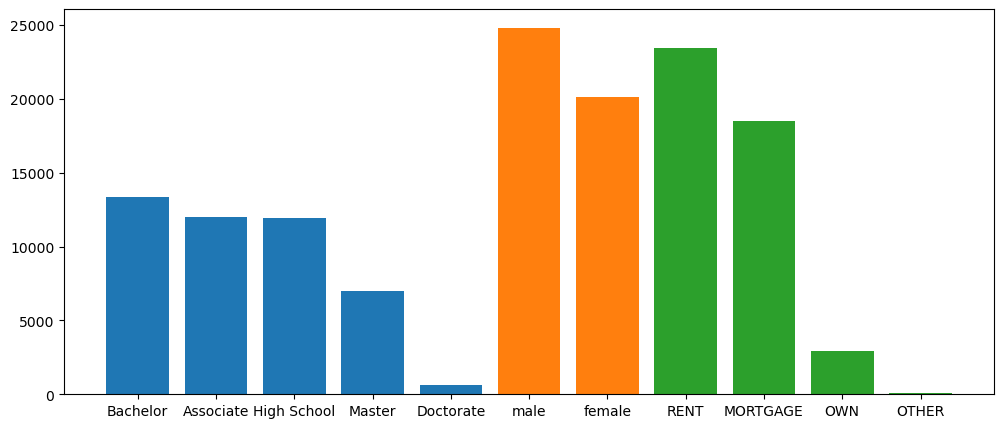

In [12]:
plt.figure(figsize=(12,5))
plt.bar(Load_data['person_education'].value_counts().index, Load_data['person_education'].value_counts())
plt.bar(Load_data['person_gender'].value_counts().index, Load_data['person_gender'].value_counts())
plt.bar(Load_data['person_home_ownership'].value_counts().index, Load_data['person_home_ownership'].value_counts())

<BarContainer object of 6 artists>

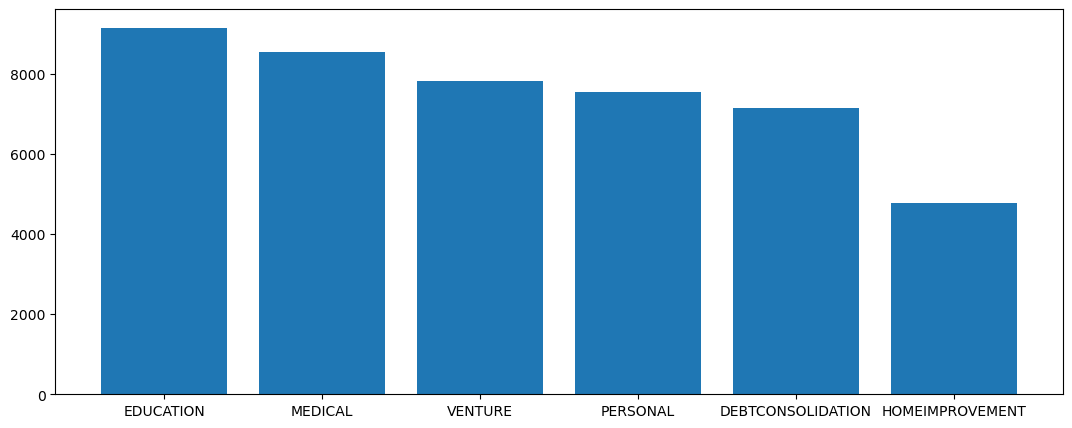

In [13]:
plt.figure(figsize=(13,5))
plt.bar(Load_data['loan_intent'].value_counts().index, Load_data['loan_intent'].value_counts())


<h3>Analysis</h3>
From above bar charts we can say that mostly loan was taken for education purpose by mostly Bachelor students

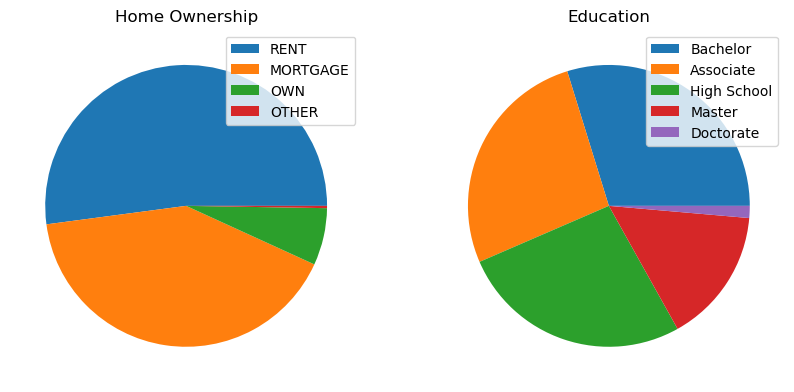

In [14]:

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.pie(Load_data['person_home_ownership'].value_counts())
plt.title('Home Ownership')
#lable each color
plt.legend(Load_data['person_home_ownership'].value_counts().index, loc='upper right')
 
plt.subplot(1,2,2)
plt.pie(Load_data['person_education'].value_counts())
plt.title('Education')
#lable each color
plt.legend(Load_data['person_education'].value_counts().index, loc='upper right')
plt.show()

<h3>Analysis</h3>
This pie chart shows that Mostly people who are at rent taken the loan 

<h1>Bivariate Analysis</h1>


<h2>Scatter Plots</h2>

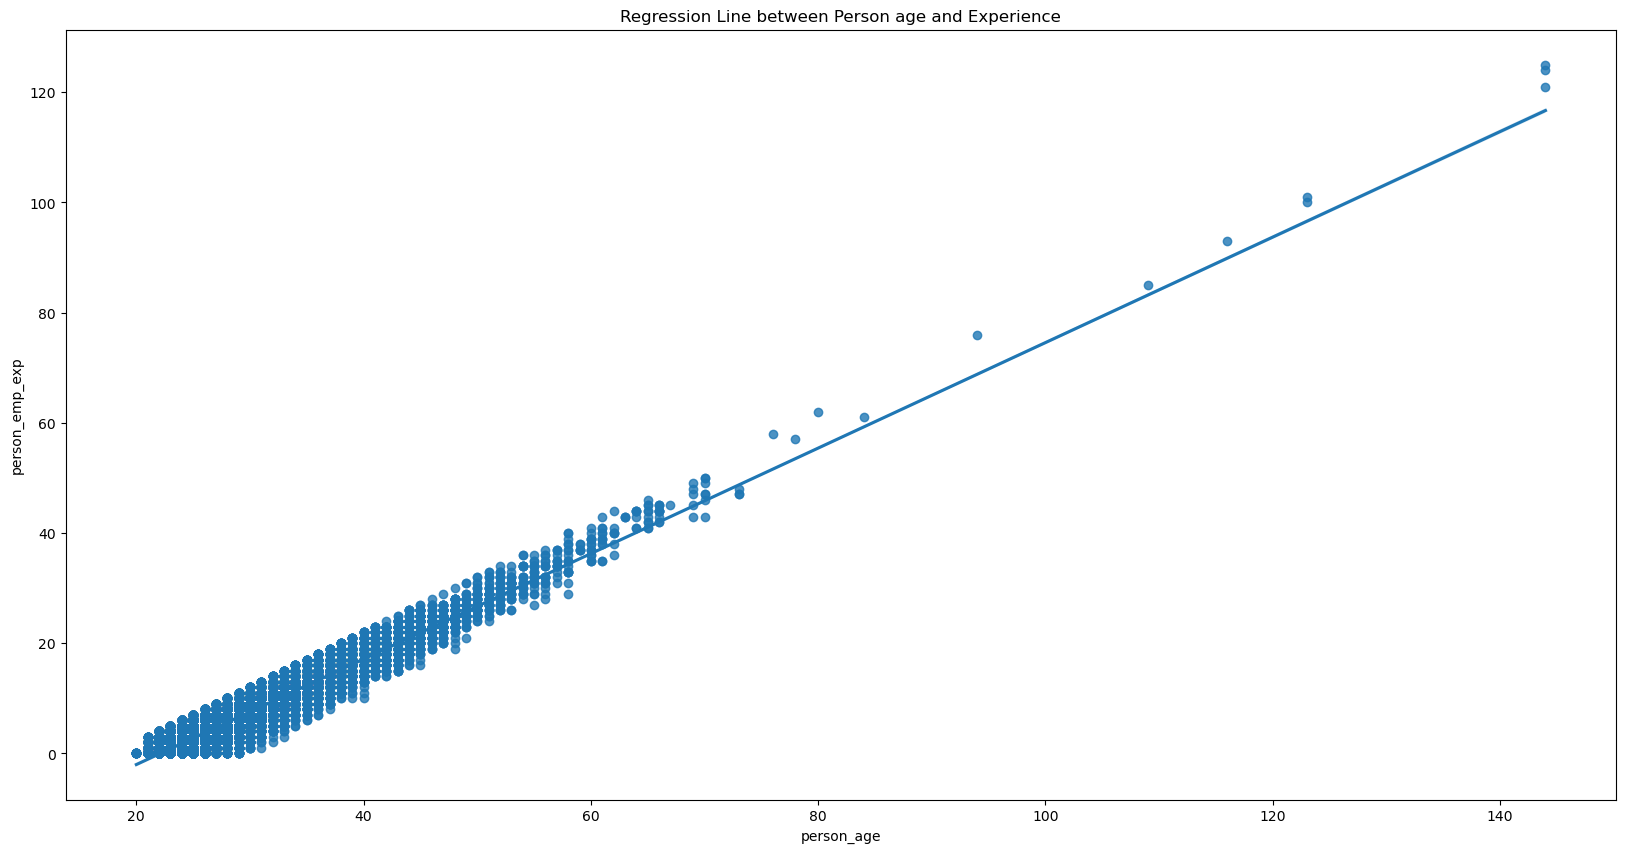

In [15]:
#show the regression lines between loan amount and age in scatter plots
plt.figure(figsize=(20,10))
sns.regplot(x='person_age', y='person_emp_exp', data=Load_data)
plt.title('Regression Line between Person age and Experience')
plt.show()


<Axes: xlabel='person_income', ylabel='loan_amnt'>

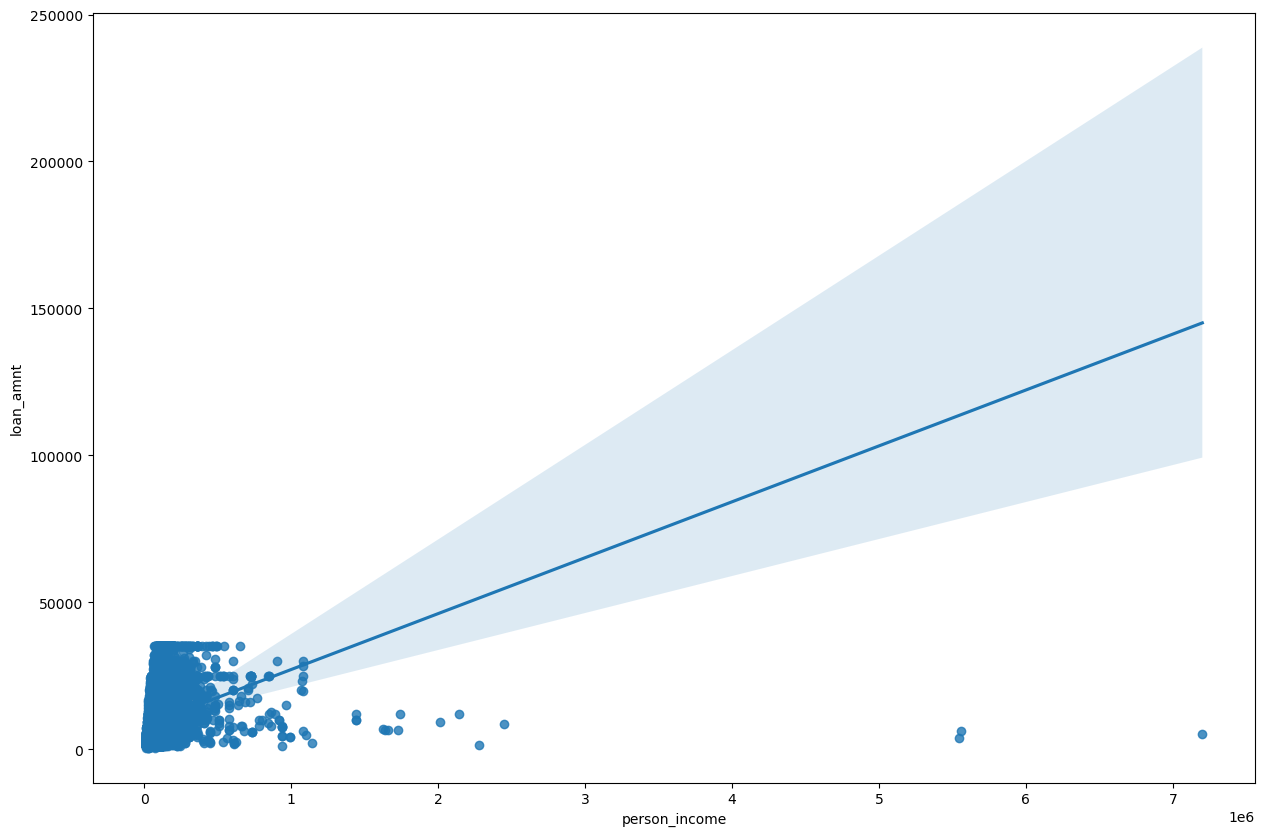

In [16]:
plt.figure(figsize=(15,10))
sns.regplot(x='person_income', y='loan_amnt', data=Load_data)

<h2>Line Plot</h2>

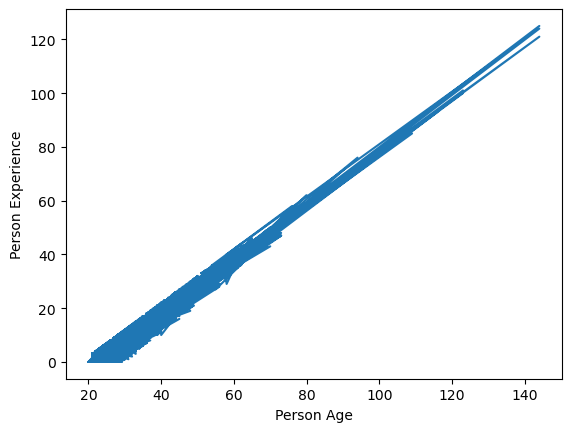

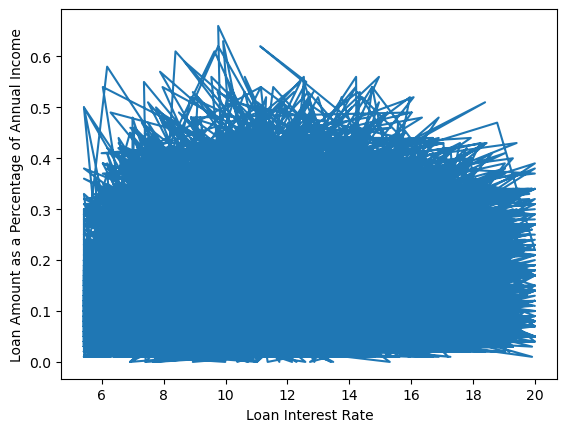

In [17]:
#As the Data is to much so it is not making any proper sense

#person age and persom experience have linear relation
plt.plot(Load_data['person_age'],Load_data['person_emp_exp'])
plt.xlabel('Person Age')
plt.ylabel('Person Experience')
plt.show()


#But loan interest rate and Loan amount as a percentage of annual income are not linear to each other
plt.plot(Load_data['loan_int_rate'],Load_data['loan_percent_income'])
plt.xlabel('Loan Interest Rate')
plt.ylabel('Loan Amount as a Percentage of Annual Income')
plt.show()



<h2>Analysis</h2>
From the above line chart we can see that person age and person experience are in linear relation to each other but on the other hand, loan interest rate and loan amount as percentage of annual income are in non_linear relation.

<h2>KDE Plot</h2>

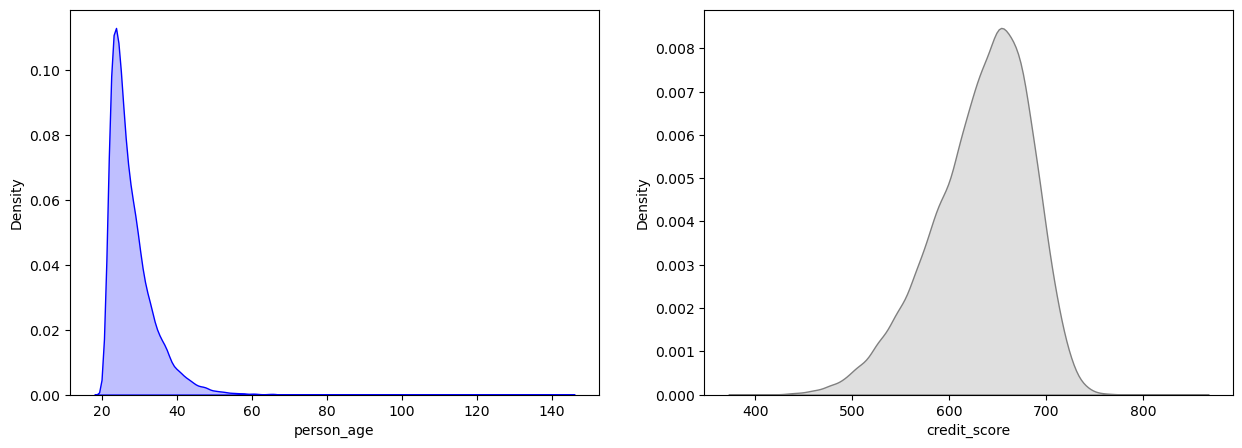

In [29]:
#KDE plot implementation 

# Convert infinite values to NaN
Load_data.replace([np.inf, -np.inf], np.nan, inplace=True)
Load_data.dropna(inplace=True)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.kdeplot(Load_data['person_age'],color='b',fill=True)
 
plt.subplot(1,2,2)
sns.kdeplot(Load_data['credit_score'],color='gray',fill=True,label='Credit Score')
plt.show()


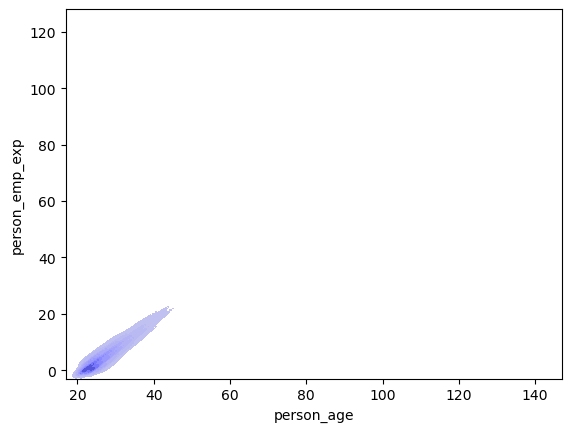

In [19]:
#NOTE:This may take time to run
#For Bivariant Analysis for KDE plot

sns.kdeplot(x=Load_data['person_age'],y=Load_data['person_emp_exp'],color='b',fill=True)
plt.show()



<h1>Exploratory Questions and Insights:</h1>

<h3>Q1:Which is the most age group who has more loan defaults? </h3>

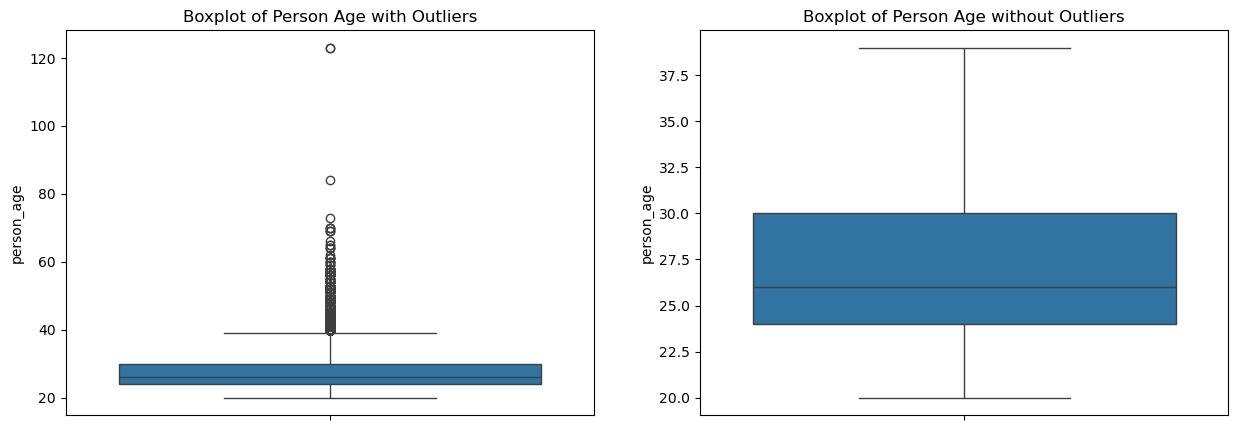

In [20]:
Defaulter = Load_data[Load_data['previous_loan_defaults_on_file'] == 'Yes']
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='person_age', data=Defaulter)
plt.title('Boxplot of Person Age with Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y='person_age', data=Defaulter, showfliers=False)
plt.title('Boxplot of Person Age without Outliers')

plt.show()

<b>Answer:</b>From this we know that people who have previous due loans are between age range of 25-30 

<h3>Q2:What is the education level of the mostly person who has previous loan dues?</h3>


Text(0, 0.5, 'Count')

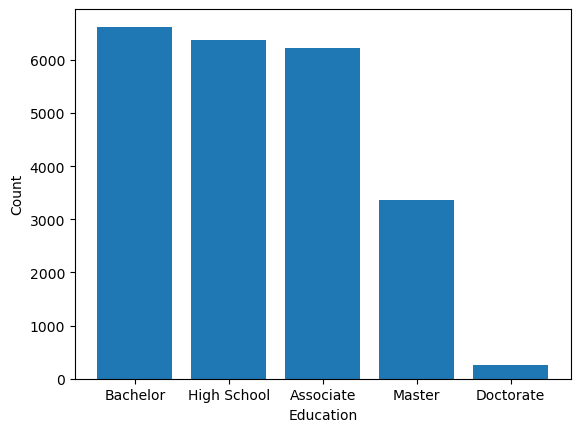

In [21]:
plt.bar(Defaulter['person_education'].value_counts().index, Defaulter['person_education'].value_counts())
plt.xlabel('Education')
plt.ylabel('Count')

<h3>Answer:</h3>From this we get to know that number of people who are doing Bachelor are the one who has most due loan.

<h2>Q3:Which Gender Due more loan other then in Bachelors?</h2>


Text(0, 0.5, 'Count')

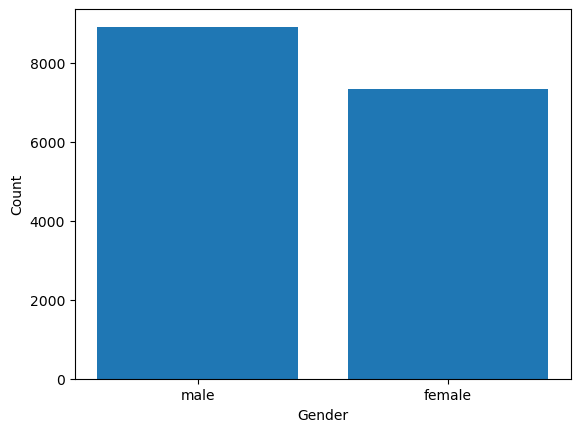

In [22]:
Gender_due=Defaulter[Defaulter['person_education']!= 'Bachelor']

plt.bar(Gender_due['person_gender'].value_counts().index, Gender_due['person_gender'].value_counts())
plt.xlabel('Gender')
plt.ylabel('Count')

<h3>Answer:</h3>From this we can see that Male gender due more loan as compare to female gender.

<h1>Q4: Which level of Education have highest average person income?</h1>

Text(0, 0.5, 'Average Income')

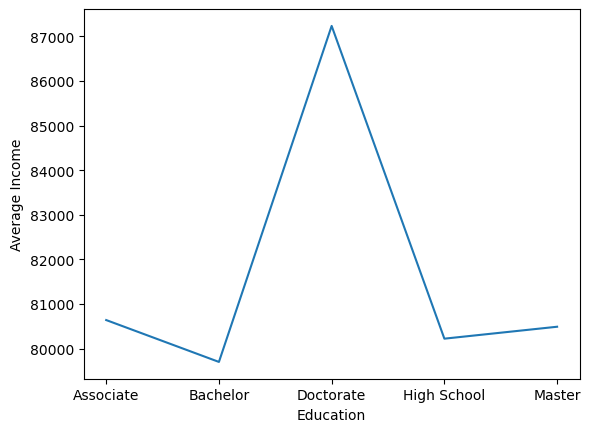

In [23]:
average_income=Load_data.groupby('person_education')['person_income'].mean()
plt.plot(average_income)
plt.xlabel('Education')
plt.ylabel('Average Income')


<h2>Answer:</h2><h3>From this Graph we can see that Person with the <b>Doctorate education</b> has the highest person income.</h3> 

<h1>Q5:How many High school student didn't get loan for personal use and how many got loan for personal use?</h1>

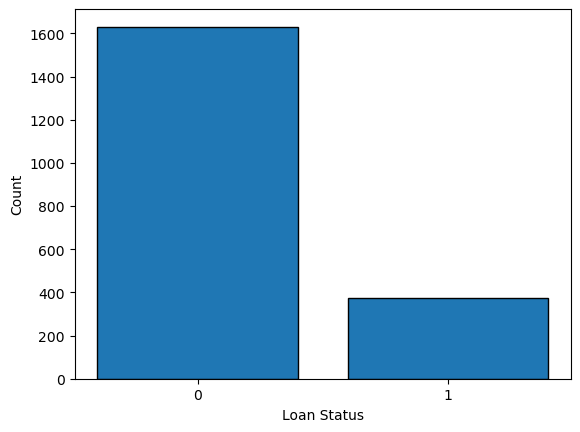

In [24]:
Student_got_load=Load_data[(Load_data['person_education']=='High School') &(Load_data['loan_intent']=='PERSONAL')]
Student_got_load

# #Use histogram to show the student who got loan and who didn't got loan
# #It should show only for 0 and 1 for loan status

# plt.stem(Student_got_load['loan_status'],Student_got_load['loan_status'].value_counts())
# axes.set_ylim(0) 

# plt.xlabel('Loan Status')
# plt.ylabel('Count')


# Use histogram to show the student who got loan and who didn't get loan
# It should show only for 0 and 1 for loan status

plt.hist(Student_got_load['loan_status'], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1])

plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

<h3>Answer:</h3>More then 1600 High school student didn't get loan for perosnal use. Only almost 300 student got loan for personal use.